In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-qwnmzkm5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-qwnmzkm5
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=179da39288f5d2034f3e6efa00d1fb17795ead18c1d81867d9da68934ab71726
  Stored in directory: /tmp/pip-ephem-wheel-cache-wzchbsiz/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [2]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
import os
from ultralytics import YOLO
import pickle
import matplotlib.pyplot as plt
import cv2
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [6]:
model = YOLO("yolo11n.pt")  # load a pretrained model

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.7MB/s]


In [7]:
from segment_anything import sam_model_registry, SamPredictor

In [8]:
import requests

# URL of the model checkpoint
url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"

# Download and save
model_path = "sam_vit_h_4b8939.pth"
response = requests.get(url, stream=True)
with open(model_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print("Download complete: ", model_path)


Download complete:  sam_vit_h_4b8939.pth


In [9]:
#initialize and run sam
checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=checkpoint)
# sam.to(device=device)
predictor = SamPredictor(sam)


In [23]:
path1 = '/content/drive/My Drive/YOLO Colab/Dataset/'
name = "Bois_d'Arc_Bash_2016_43_(parade).jpg"
name2 = "truck.jpg"
path = path1 + name
path2 = path1 + name2
print(path2)
image = cv2.imread(path)
image2 = cv2.imread(path2)
image = image2
# cv2_imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
objects = model(image, save = True, classes = [7])
# img = cv2.imread("")

/content/drive/My Drive/YOLO Colab/Dataset/truck.jpg

0: 448x640 1 truck, 166.6ms
Speed: 6.6ms preprocess, 166.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [24]:
#Plot a rect around obj
for result in objects:
  boxes =  result.boxes #Bbox output boxes
  # cls = [7]
  cls = boxes.cls

  # class_names = ['person', 'bicycle']

  class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire']
  output_index = cls
  print(output_index)
  for i in output_index.tolist():
    output_index = int(i)
    class_name = class_names[output_index]
    # print(class_name)

    if len(cls) > 0 and cls[0] == 7:

      # Get the coordinates of the bounding box
      x1, y1, x2, y2 = boxes.xyxy.tolist()[0]

      # Plot the rectangle around the detected object
      cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

      # Add text to the rectangle
      text = class_name
      font = cv2.FONT_HERSHEY_SIMPLEX
      font_scale = 1.5
      thickness = 4
      text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
      text_x = int(x1 + 5)
      text_y = int(y1 + text_size[1] + 5)
      cv2.putText(image, text, (text_x, text_y), font, font_scale, (0, 0, 255), thickness)

      #show image
      # plt.figure(figsize=(10, 10))
      # plt.imshow(image)
      # show_mask(masks[0], plt.gca())
      # show_box(input_box, plt.gca())
      # plt.axis('off')
      # plt.savefig('output.png')
      # plt.show()


tensor([7.])


input_box [     79.878      276.83      1688.5      852.25]


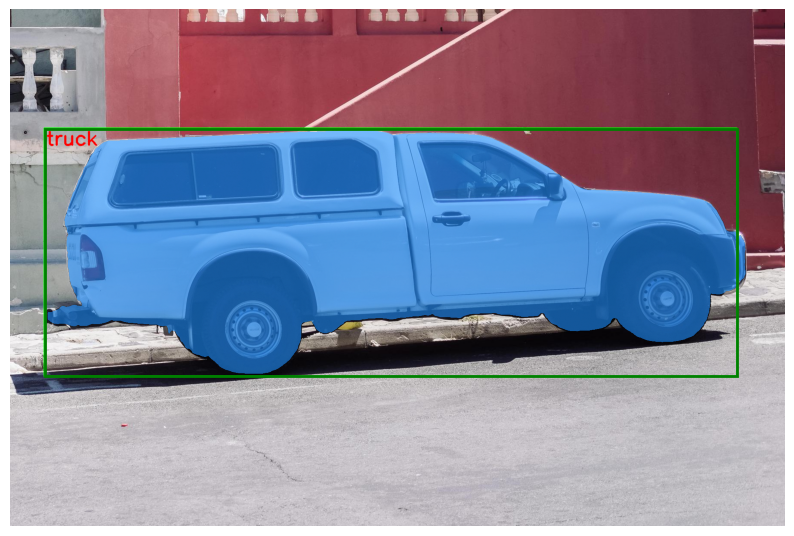

In [26]:
predictor.set_image(image)

input_box = np.array(boxes.xyxy.tolist()[0])
print("input_box", input_box)

#create mask
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

#show image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.savefig('output.png')
plt.show()


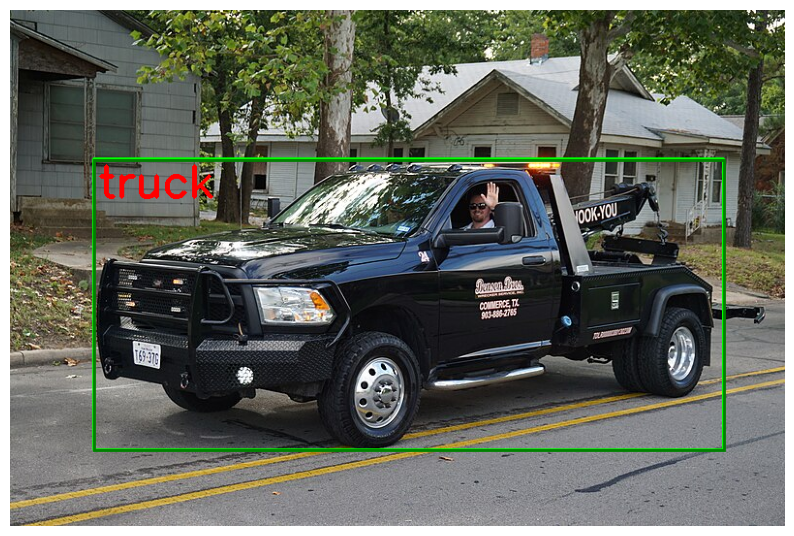

In [21]:
#show image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.savefig('output.png')
plt.show()